In [0]:
# Import the machine learning libraries.
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [0]:
# Load the dataset.
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


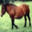

In [0]:
from keras.preprocessing.image import array_to_img
pic = array_to_img(X_train[7])
display(pic)

In [0]:
# Define the labels of the dataset.
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

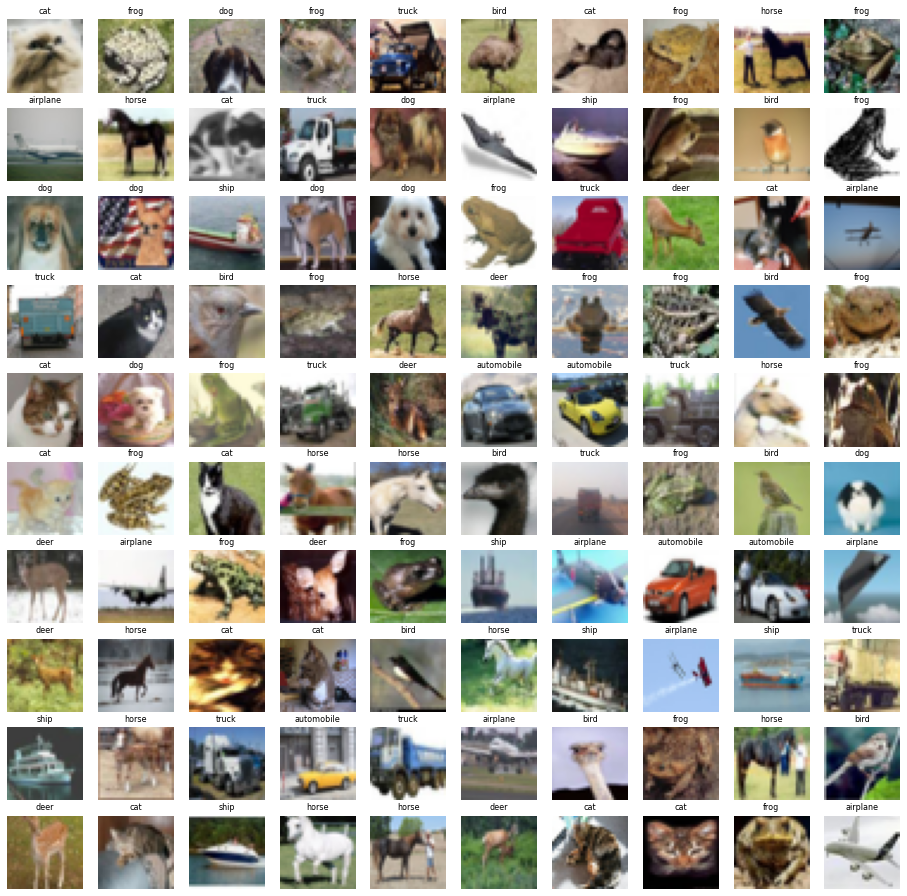

In [0]:
fig, axes = plt.subplots(10, 10, figsize = (16,16))
axes = axes.ravel()

n_train = len(X_train)
for i in np.arange(0, 10*10):
    index = np.random.randint(0, n_train)   
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [0]:
# Scale the data.
X_train = X_train / 255
X_test = X_test / 255

In [0]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [0]:
# Early Stopping.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [0]:
# Data Augmentations.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [0]:
r = model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop] # Uncomment for higher accuracy up to ~94%.
             )

Epoch 1/100
1562/1562 [==============================] - 470s 301ms/step - loss: 1.5627 - accuracy: 0.4413 - val_loss: 1.4114 - val_accuracy: 0.4995
Epoch 2/100
1562/1562 [==============================] - 470s 301ms/step - loss: 1.1356 - accuracy: 0.6002 - val_loss: 1.0879 - val_accuracy: 0.6319
Epoch 3/100
1562/1562 [==============================] - 471s 301ms/step - loss: 0.9672 - accuracy: 0.6630 - val_loss: 0.9556 - val_accuracy: 0.6778
Epoch 4/100
1562/1562 [==============================] - 468s 300ms/step - loss: 0.8819 - accuracy: 0.6952 - val_loss: 0.8734 - val_accuracy: 0.7159
Epoch 5/100
1562/1562 [==============================] - 465s 298ms/step - loss: 0.8057 - accuracy: 0.7231 - val_loss: 0.7491 - val_accuracy: 0.7529
Epoch 6/100
1562/1562 [==============================] - 470s 301ms/step - loss: 0.7533 - accuracy: 0.7422 - val_loss: 0.7022 - val_accuracy: 0.7673
Epoch 7/100
1562/1562 [==============================] - 462s 296ms/step - loss: 0.7126 - accuracy: 0.7571

Text(0.5, 1.0, 'Accuracy evolution')

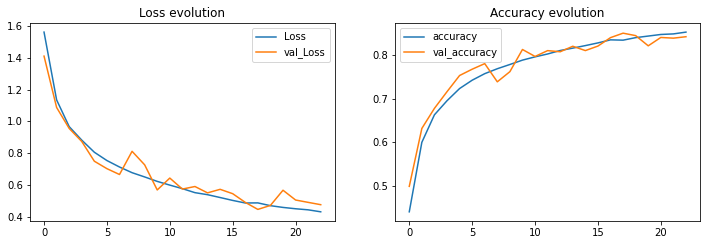

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [0]:
evaluation = model.evaluate(X_test, y_cat_test)
print('Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 20s 65ms/step - loss: 0.4751 - accuracy: 0.8416
Test Accuracy : {evaluation[1] * 100:.2f}%


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.87      0.97      0.91      1000
           2       0.83      0.77      0.80      1000
           3       0.76      0.66      0.71      1000
           4       0.89      0.75      0.81      1000
           5       0.74      0.84      0.78      1000
           6       0.73      0.95      0.83      1000
           7       0.94      0.87      0.90      1000
           8       0.96      0.85      0.90      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



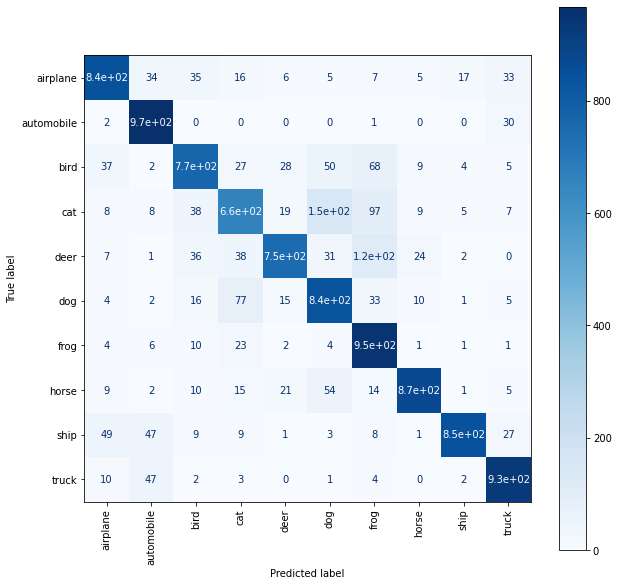

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
#plt.show()

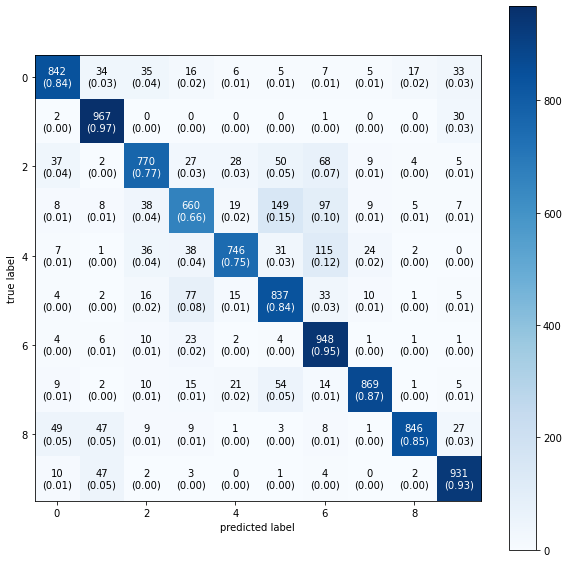

In [0]:
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(10,10))
plt.show()

In [0]:
model.save('/content/drive/My Drive/ML_Code/CIFAR10 Classifier/' + 'cifar10-100epoch-classifier.h5')